# Subway Data Cleaining

In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240607.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

C:\Users\natha\AppData\Local\Temp\ipykernel_17480\1029805167.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240607.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)


In [3]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,Counties,NYS Municipal Boundaries,New York Zip Codes
0,12/15/2022 06:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,2,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
1,06/16/2022 01:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,59,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
2,04/17/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,21,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
3,04/13/2022 07:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,744,4,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
4,12/03/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,85,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0


In [4]:
df.shape

(14628474, 15)

In [5]:
df.dtypes

transit_timestamp            object
transit_mode                 object
station_complex_id           object
station_complex              object
borough                      object
payment_method               object
fare_class_category          object
ridership                     int64
transfers                     int64
latitude                    float64
longitude                   float64
Georeference                 object
Counties                      int64
NYS Municipal Boundaries      int64
New York Zip Codes          float64
dtype: object

In [6]:
# Get the number of unique values for each column
unique_counts = df.nunique()

# Print the unique counts for each column
print("Unique counts for each column:\n", unique_counts)

Unique counts for each column:
 transit_timestamp           16764
transit_mode                    2
station_complex_id            244
station_complex               123
borough                         1
payment_method                  2
fare_class_category            10
ridership                    6454
transfers                     822
latitude                      293
longitude                     294
Georeference                  322
Counties                        2
NYS Municipal Boundaries        1
New York Zip Codes             43
dtype: int64


In [7]:
print("transit_mode: ", df['transit_mode'].unique().tolist(), "\n")
print("payment_method: ", df['payment_method'].unique().tolist(), "\n")
print("fare_class_category: ", df['fare_class_category'].unique().tolist(), "\n")

transit_mode:  ['subway', 'tram'] 

payment_method:  ['metrocard', 'omny'] 

fare_class_category:  ['Metrocard - Other', 'Metrocard - Full Fare', 'Metrocard - Seniors & Disability', 'OMNY - Full Fare', 'Metrocard - Fair Fare', 'Metrocard - Unlimited 7-Day', 'Metrocard - Students', 'OMNY - Other', 'OMNY - Seniors & Disability', 'Metrocard - Unlimited 30-Day'] 



In [8]:
#only include subway
df = df[df['transit_mode'] == 'subway']

In [9]:
 # check null value
df.isnull().sum()

transit_timestamp                 0
transit_mode                      0
station_complex_id                0
station_complex                   0
borough                           0
payment_method                    0
fare_class_category               0
ridership                         0
transfers                         0
latitude                          0
longitude                         0
Georeference                      0
Counties                          0
NYS Municipal Boundaries          0
New York Zip Codes          1018183
dtype: int64

In [10]:
columns_to_keep = [
    'transit_timestamp', 'transit_mode', 'station_complex_id', 
    'borough', 'payment_method', 'ridership', 
    'latitude', 'longitude', 'Georeference'
]

# Select only the specified columns
df = df.loc[:, columns_to_keep]

In [11]:
#Convert transit_timestamp to datetime format
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
df

,transit_timestamp,transit_mode,station_complex_id,borough,payment_method,ridership,latitude,longitude,Georeference
0,2022-12-15 06:00:00,subway,225,Manhattan,metrocard,2,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234)
1,2022-06-16 01:00:00,subway,225,Manhattan,metrocard,59,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234)
2,2022-04-17 17:00:00,subway,225,Manhattan,metrocard,21,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234)
3,2022-04-13 19:00:00,subway,225,Manhattan,metrocard,744,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234)
4,2022-12-03 17:00:00,subway,225,Manhattan,metrocard,85,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234)
...,...,...,...,...,...,...,...,...,...
14628469,2022-05-30 17:00:00,subway,325,Manhattan,metrocard,1,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781)
14628470,2022-09-08 21:00:00,subway,325,Manhattan,metrocard,6,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781)
14628471,2022-03-07 13:00:00,subway,325,Manhattan,metrocard,8,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781)
14628472,2022-03-29 11:00:00,subway,325,Manhattan,metrocard,5,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781)


In [13]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
    
df.dtypes

transit_timestamp     datetime64[ns]
transit_mode                category
station_complex_id          category
borough                     category
payment_method              category
ridership                      int64
latitude                     float64
longitude                    float64
Georeference                category
dtype: object

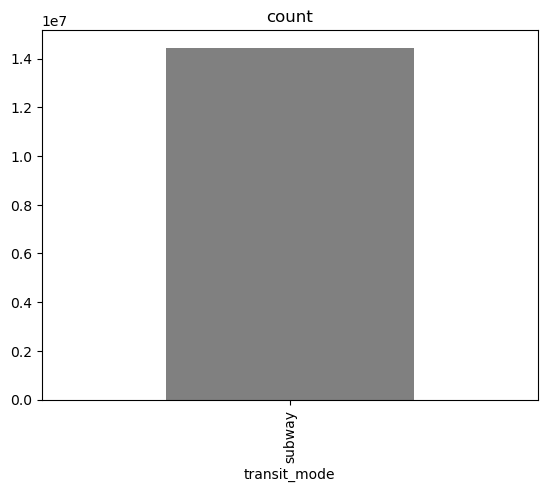

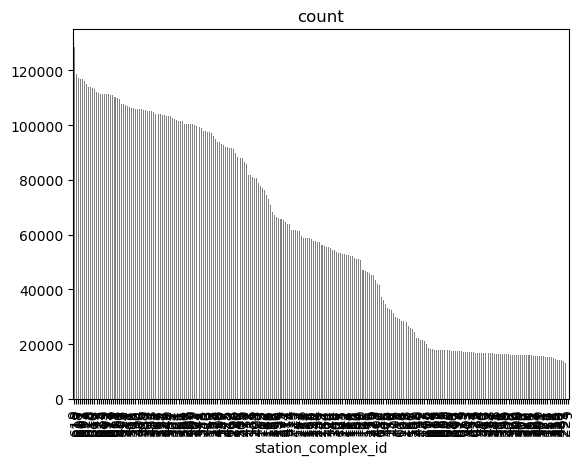

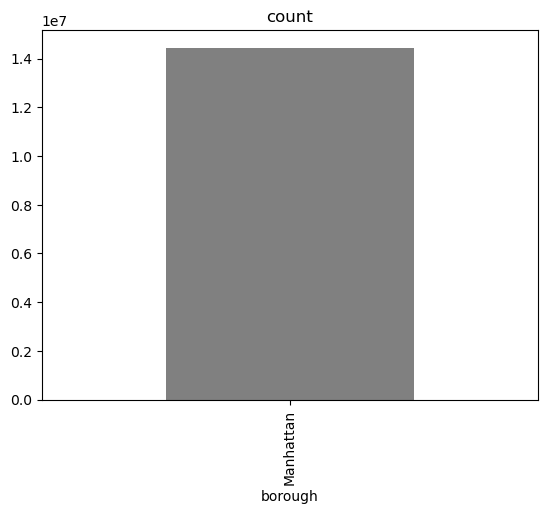

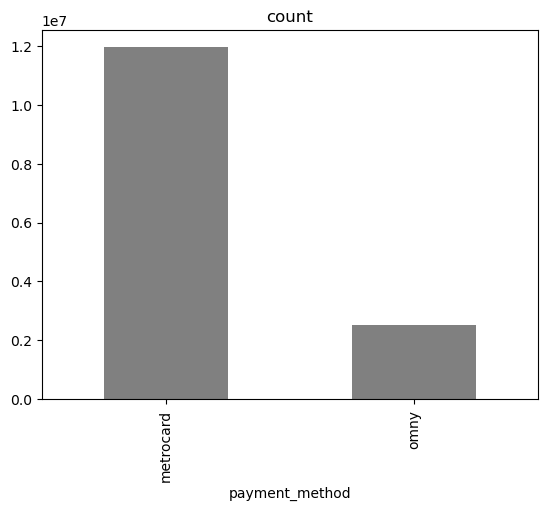

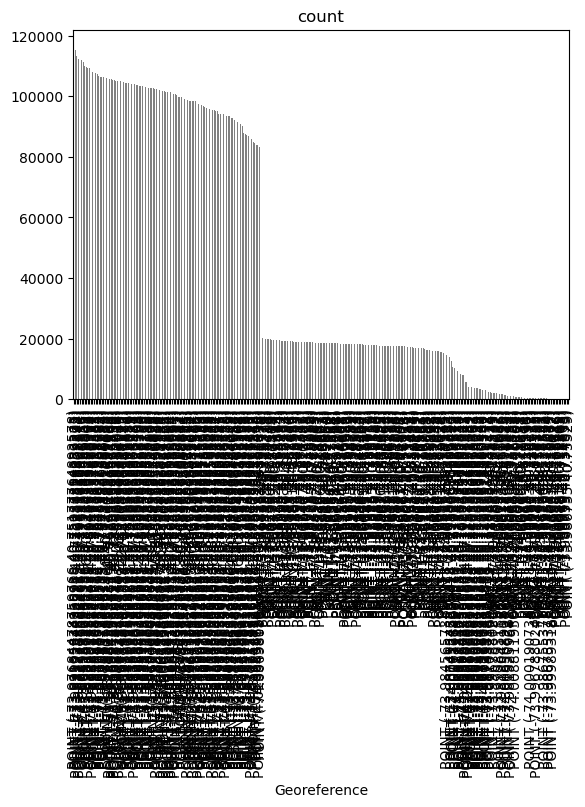

In [14]:
# Plot bar plots for categorical features
categorical_features = df.select_dtypes(include='category').columns
for col in categorical_features:
    plt.figure()
    df[col].value_counts(dropna=False).plot(kind='bar',subplots=True, figsize=(10,3), sharex=False, sharey=False, color = 'grey')
    plt.show()

In [15]:
df[categorical_features].describe().T

,count,unique,top,freq
transit_mode,14452658,1,subway,14452658
station_complex_id,14452658,242,9,128586
borough,14452658,1,Manhattan,14452658
payment_method,14452658,2,metrocard,11936053
Georeference,14452658,318,POINT (-73.97684478759766 40.75177764892578),116171


<AxesSubplot:>

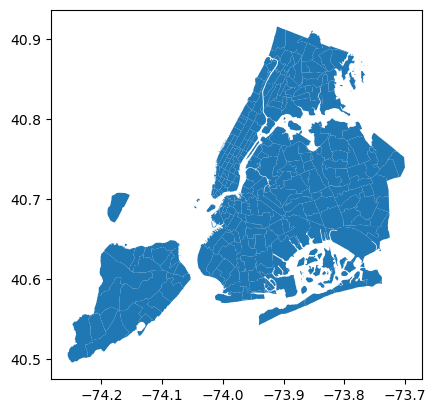

In [16]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the geojson file containing NYC taxi zones
taxi_zones = gpd.read_file('../../datasets/raw/taxi_raw/NYC_Taxi_Zones.geojson')

# Plot the GeoDataFrame
taxi_zones.plot()

In [17]:
taxi_zones.head()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


In [18]:
gdf_taxi_zone = gpd.GeoDataFrame(taxi_zones, geometry='geometry')
gdf_taxi_zone

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."


In [21]:
df['Coordinates'] = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

gdf_subway = gpd.GeoDataFrame(df, geometry='Coordinates')

In [22]:
gdf_subway

,transit_timestamp,transit_mode,station_complex_id,borough,payment_method,ridership,latitude,longitude,Georeference,Coordinates
0,2022-12-15 06:00:00,subway,225,Manhattan,metrocard,2,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866)
1,2022-06-16 01:00:00,subway,225,Manhattan,metrocard,59,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866)
2,2022-04-17 17:00:00,subway,225,Manhattan,metrocard,21,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866)
3,2022-04-13 19:00:00,subway,225,Manhattan,metrocard,744,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866)
4,2022-12-03 17:00:00,subway,225,Manhattan,metrocard,85,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866)
...,...,...,...,...,...,...,...,...,...,...
14628469,2022-05-30 17:00:00,subway,325,Manhattan,metrocard,1,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285)
14628470,2022-09-08 21:00:00,subway,325,Manhattan,metrocard,6,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285)
14628471,2022-03-07 13:00:00,subway,325,Manhattan,metrocard,8,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285)
14628472,2022-03-29 11:00:00,subway,325,Manhattan,metrocard,5,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285)


In [23]:
# Ensure both GeoDataFrames are using the same CRS
gdf_subway = gdf_subway.set_crs("EPSG:4326")
gdf_taxi_zone = gdf_taxi_zone.set_crs("EPSG:4326")

# Perform spatial join with the 'predicate' parameter
result = gpd.sjoin(gdf_subway, gdf_taxi_zone, how="inner", predicate='intersects')

In [24]:
result

,transit_timestamp,transit_mode,station_complex_id,borough_left,payment_method,ridership,latitude,longitude,Georeference,Coordinates,index_right,shape_area,objectid,shape_leng,location_id,zone,borough_right
0,2022-12-15 06:00:00,subway,225,Manhattan,metrocard,2,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866),229,0.0000560914463266,230,0.0310283096779,230,Times Sq/Theatre District,Manhattan
1,2022-06-16 01:00:00,subway,225,Manhattan,metrocard,59,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866),229,0.0000560914463266,230,0.0310283096779,230,Times Sq/Theatre District,Manhattan
2,2022-04-17 17:00:00,subway,225,Manhattan,metrocard,21,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866),229,0.0000560914463266,230,0.0310283096779,230,Times Sq/Theatre District,Manhattan
3,2022-04-13 19:00:00,subway,225,Manhattan,metrocard,744,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866),229,0.0000560914463266,230,0.0310283096779,230,Times Sq/Theatre District,Manhattan
4,2022-12-03 17:00:00,subway,225,Manhattan,metrocard,85,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),POINT (-73.98133 40.75866),229,0.0000560914463266,230,0.0310283096779,230,Times Sq/Theatre District,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628469,2022-05-30 17:00:00,subway,325,Manhattan,metrocard,1,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285),90,0.0000764293209892,125,0.0497322121757,125,Hudson Sq,Manhattan
14628470,2022-09-08 21:00:00,subway,325,Manhattan,metrocard,6,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285),90,0.0000764293209892,125,0.0497322121757,125,Hudson Sq,Manhattan
14628471,2022-03-07 13:00:00,subway,325,Manhattan,metrocard,8,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285),90,0.0000764293209892,125,0.0497322121757,125,Hudson Sq,Manhattan
14628472,2022-03-29 11:00:00,subway,325,Manhattan,metrocard,5,40.722855,-74.006279,POINT (-74.00627899169922 40.72285461425781),POINT (-74.00628 40.72285),90,0.0000764293209892,125,0.0497322121757,125,Hudson Sq,Manhattan


In [26]:
df = result[['transit_timestamp', 'transit_mode', 'station_complex_id', 'payment_method', 'ridership', 'objectid',"zone", "borough_right" ]]
df

,transit_timestamp,transit_mode,station_complex_id,payment_method,ridership,objectid,zone,borough_right
0,2022-12-15 06:00:00,subway,225,metrocard,2,230,Times Sq/Theatre District,Manhattan
1,2022-06-16 01:00:00,subway,225,metrocard,59,230,Times Sq/Theatre District,Manhattan
2,2022-04-17 17:00:00,subway,225,metrocard,21,230,Times Sq/Theatre District,Manhattan
3,2022-04-13 19:00:00,subway,225,metrocard,744,230,Times Sq/Theatre District,Manhattan
4,2022-12-03 17:00:00,subway,225,metrocard,85,230,Times Sq/Theatre District,Manhattan
...,...,...,...,...,...,...,...,...
14628469,2022-05-30 17:00:00,subway,325,metrocard,1,125,Hudson Sq,Manhattan
14628470,2022-09-08 21:00:00,subway,325,metrocard,6,125,Hudson Sq,Manhattan
14628471,2022-03-07 13:00:00,subway,325,metrocard,8,125,Hudson Sq,Manhattan
14628472,2022-03-29 11:00:00,subway,325,metrocard,5,125,Hudson Sq,Manhattan


In [27]:
# check null value
df.isnull().sum()

transit_timestamp     0
transit_mode          0
station_complex_id    0
payment_method        0
ridership             0
objectid              0
zone                  0
borough_right         0
dtype: int64

In [28]:
print("borough: ", result['borough_right'].unique().tolist(), "\n")
print("objectid: ", result['objectid'].unique().tolist(), "\n")
print("zone: ", result['zone'].unique().tolist(), "\n")

borough:  ['Manhattan'] 

objectid:  ['230', '234', '148', '79', '232', '164', '243', '127', '244', '116', '161', '153', '166', '152', '24', '88', '43', '163', '238', '113', '90', '186', '249', '125', '231', '87', '107', '261', '41', '246', '141', '45', '48', '100', '202', '237', '142', '75', '162', '239', '42', '151', '229', '143', '236', '74', '114', '209', '263', '144', '211', '68'] 

zone:  ['Times Sq/Theatre District', 'Union Sq', 'Lower East Side', 'East Village', 'Two Bridges/Seward Park', 'Midtown South', 'Washington Heights North', 'Inwood', 'Washington Heights South', 'Hamilton Heights', 'Midtown Center', 'Marble Hill', 'Morningside Heights', 'Manhattanville', 'Bloomingdale', 'Financial District South', 'Central Park', 'Midtown North', 'Upper West Side North', 'Greenwich Village North', 'Flatiron', 'Penn Station/Madison Sq West', 'West Village', 'Hudson Sq', 'TriBeCa/Civic Center', 'Financial District North', 'Gramercy', 'World Trade Center', 'Central Harlem', 'West Chelsea/H

In [29]:
df.to_csv("basic_subway_df.csv", index=False)

In [37]:
df = pd.read_csv('basic_subway_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [40]:
df.shape

(14452658, 8)

In [38]:
# Group by station_complex_id and transit_timestamp, then sum the ridership
hourly_ridership = df.groupby(['objectid', 'transit_timestamp' ])['ridership'].sum().reset_index()

# Print the result
hourly_ridership

,objectid,transit_timestamp,ridership
0,24,2022-02-01 00:00:00,25
1,24,2022-02-01 01:00:00,11
2,24,2022-02-01 02:00:00,6
3,24,2022-02-01 03:00:00,6
4,24,2022-02-01 04:00:00,8
...,...,...,...
863684,263,2023-12-31 11:00:00,601
863685,263,2023-12-31 12:00:00,635
863686,263,2023-12-31 13:00:00,759
863687,263,2023-12-31 14:00:00,598


In [53]:
df = hourly_ridership
df['datetime'] = df['transit_timestamp'] 
df['taxi_zone'] = df['objectid'] 

# Now, drop the 'objectid' column if it's not needed
df.drop('transit_timestamp', axis=1, inplace=True)
df.drop('objectid', axis=1, inplace=True)
df.dtypes

ridership     int64
datetime     object
taxi_zone     int64
dtype: object

In [54]:
df['datetime'] = df['datetime'].astype('datetime64[us]')

object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')  
    
df['taxi_zone'] = df['taxi_zone'].astype('category')   

    
df.dtypes

ridership             int64
datetime     datetime64[us]
taxi_zone          category
dtype: object

In [55]:
# Extract year and month
df['year_month'] = df['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
df['day'] = df['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
df['week'] = df['datetime'].dt.dayofweek

# Extract hour of the day
df['hour'] = df['datetime'].dt.hour

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['week'] = df['week'].apply(lambda x: days[x])

In [63]:
df

,datetime,taxi_zone,year_month,day,week,hour,passenger_count
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8
...,...,...,...,...,...,...,...
863684,2023-12-31 11:00:00,263,2023-12,31,Sunday,11,601
863685,2023-12-31 12:00:00,263,2023-12,31,Sunday,12,635
863686,2023-12-31 13:00:00,263,2023-12,31,Sunday,13,759
863687,2023-12-31 14:00:00,263,2023-12,31,Sunday,14,598


In [64]:
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   


df["day"] = df["day"].astype('category') 
df["hour"] = df["hour"].astype('category') 
df["year_month"] = df["year_month"].astype('category') 




print(df.dtypes)
df

datetime           datetime64[us]
taxi_zone                category
year_month               category
day                      category
week                     category
hour                     category
passenger_count             int64
dtype: object


,datetime,taxi_zone,year_month,day,week,hour,passenger_count
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8
...,...,...,...,...,...,...,...
863684,2023-12-31 11:00:00,263,2023-12,31,Sunday,11,601
863685,2023-12-31 12:00:00,263,2023-12,31,Sunday,12,635
863686,2023-12-31 13:00:00,263,2023-12,31,Sunday,13,759
863687,2023-12-31 14:00:00,263,2023-12,31,Sunday,14,598


''

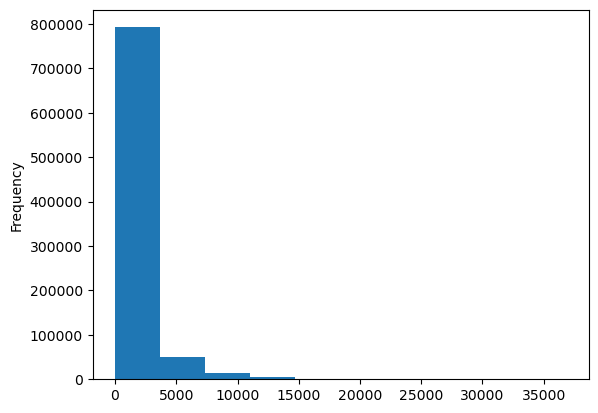

In [65]:
plt.figure()
hourly_ridership["passenger_count"].plot(kind='hist')
# plt.savefig('continuous_histograms.pdf')
;

passenger_count    AxesSubplot(0.125,0.77;0.168478x0.11)
dtype: object

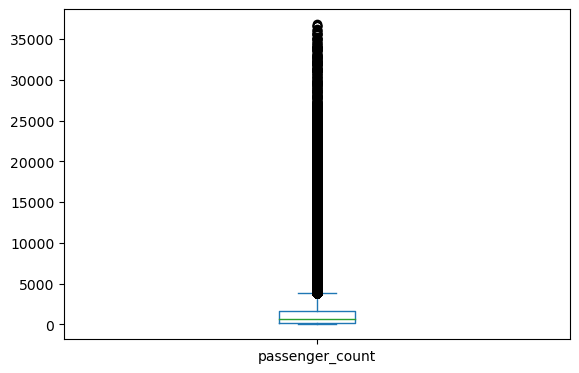

In [66]:
hourly_ridership["passenger_count"].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)

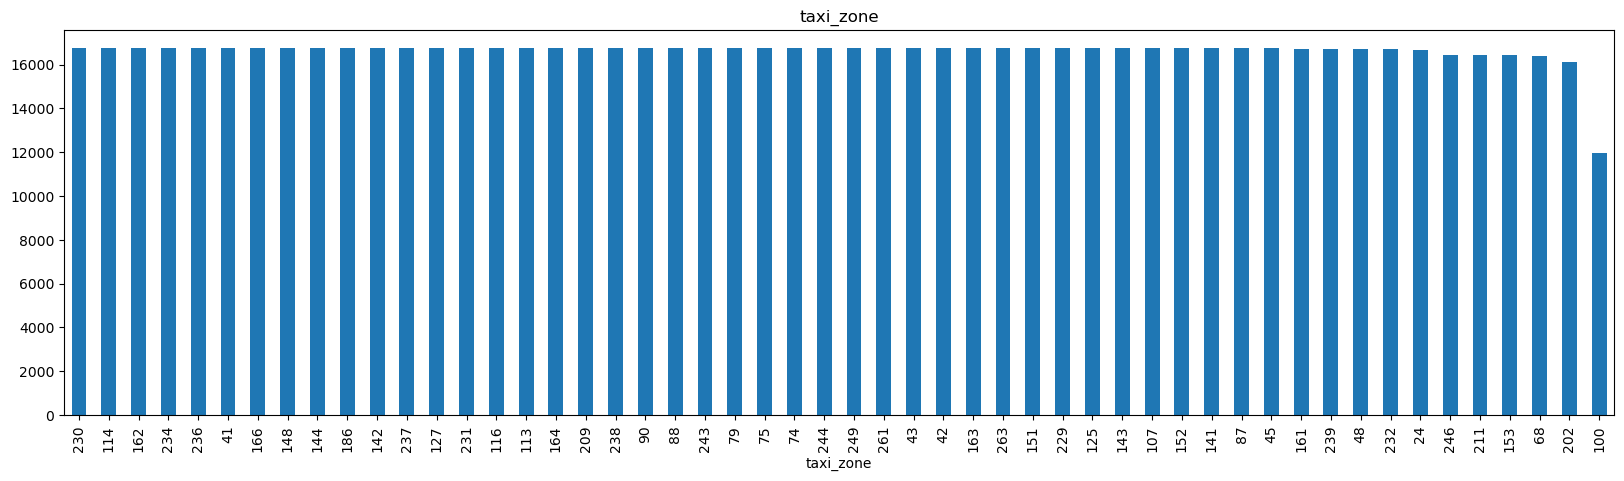

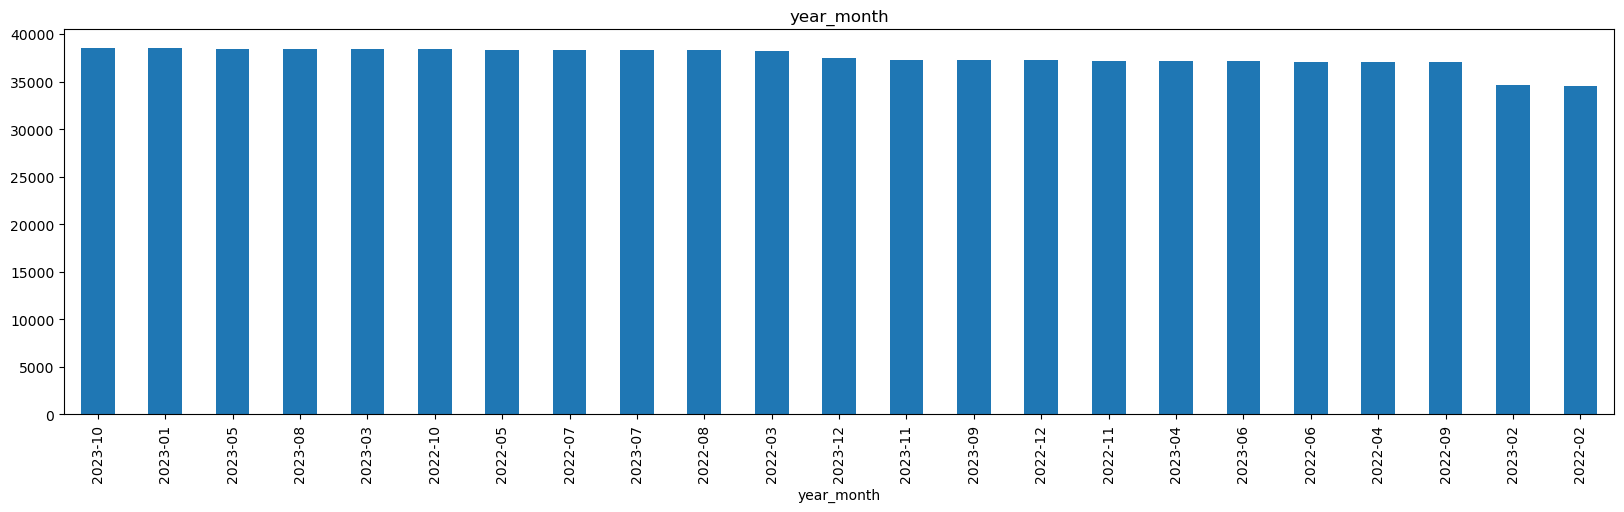

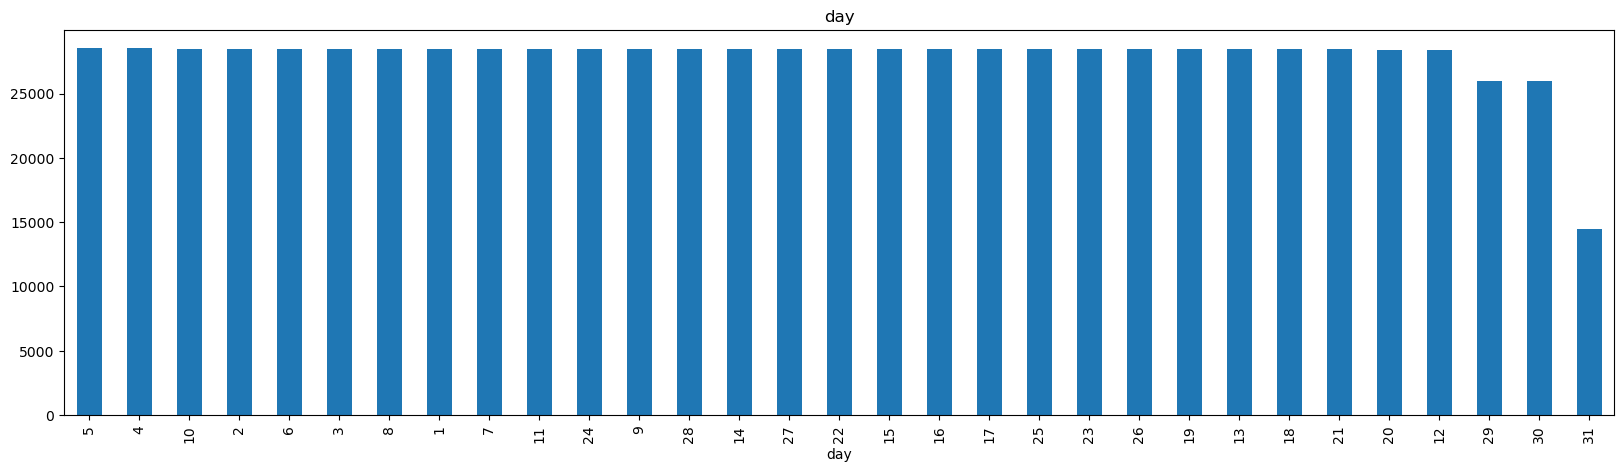

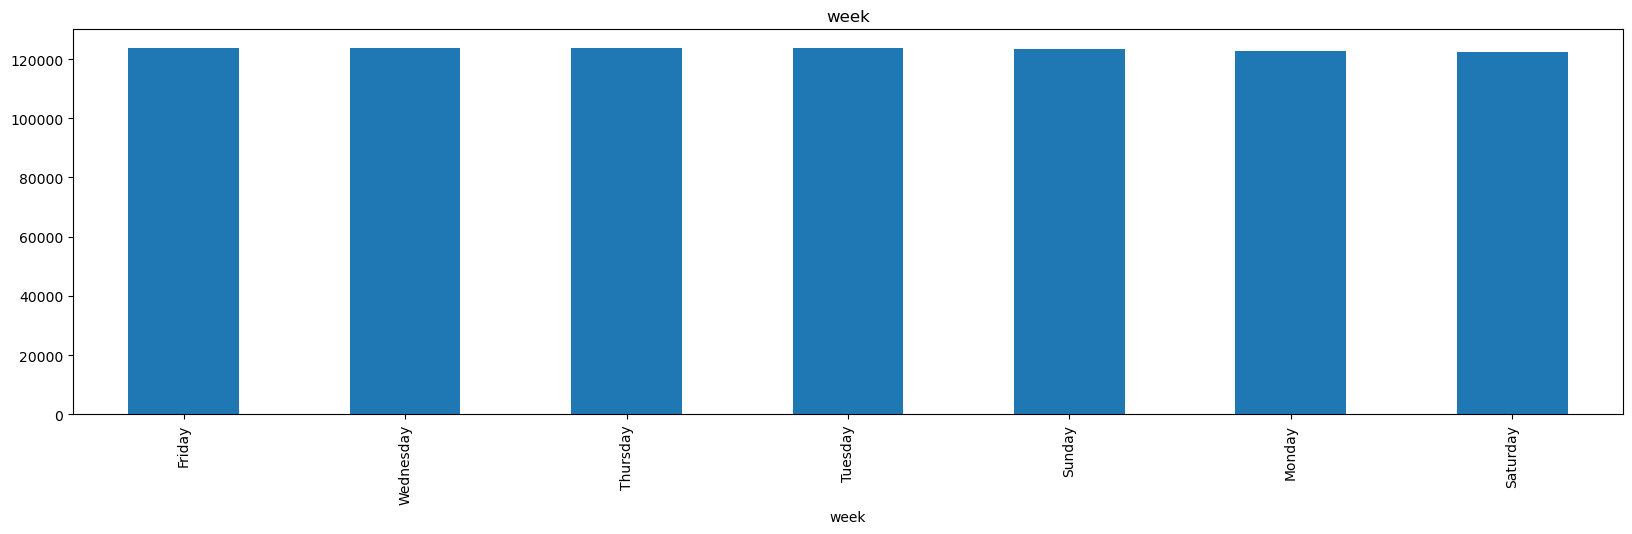

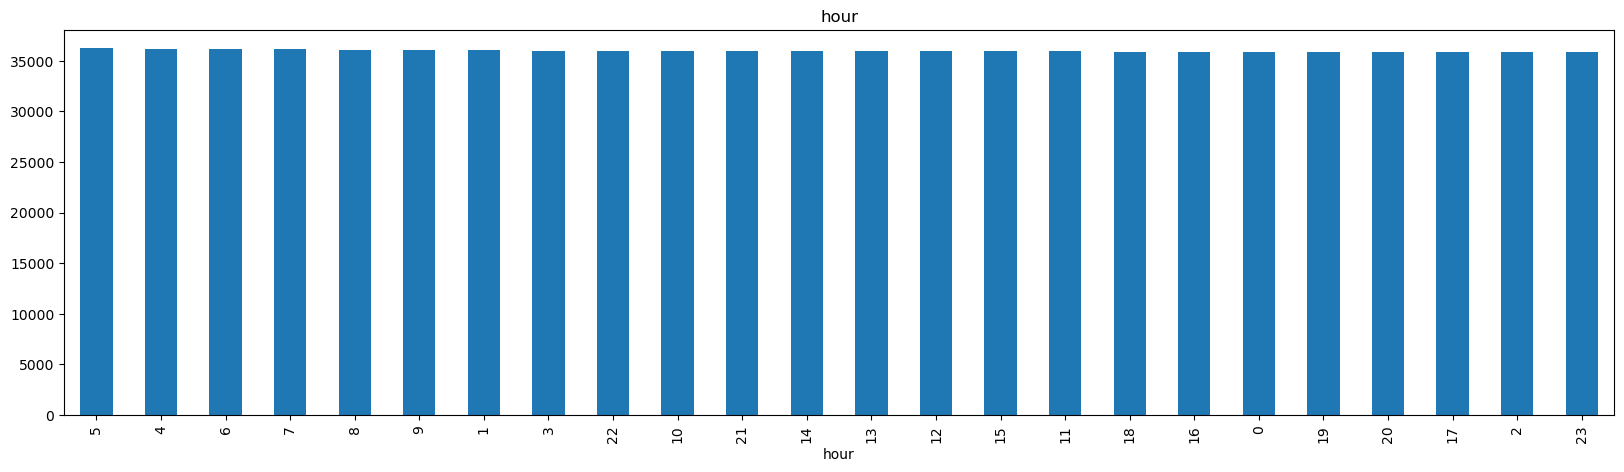

In [67]:
# Plot bar plots for all the catagorical features
category_columns = hourly_ridership.select_dtypes(['category'])
for col in category_columns:
    f = hourly_ridership[col].value_counts().plot(kind='bar', figsize=(20,5))
    plt.title(col)
    plt.show()

In [68]:
# Define the list of months in your range
month_list = ["2023-12", "2023-11", "2023-10", "2023-09", "2023-08", "2023-07", "2023-06", "2023-05", "2023-04", "2023-03", "2023-02", "2023-01",
              "2022-12", "2022-11", "2022-10", "2022-09", "2022-08", "2022-07", "2022-06", "2022-05", "2022-04", "2022-03", "2022-02", "2022-01"]

# Check for rows with months not in the specified range
out_range_month = df[~df['year_month'].isin(month_list)]

# Display the rows with months not in the specified range
out_range_month

,datetime,taxi_zone,year_month,day,week,hour,passenger_count


In [69]:
df['company'] = 'Subway'

In [70]:
df

,datetime,taxi_zone,year_month,day,week,hour,passenger_count,company
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25,Subway
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11,Subway
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6,Subway
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6,Subway
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8,Subway
...,...,...,...,...,...,...,...,...
863684,2023-12-31 11:00:00,263,2023-12,31,Sunday,11,601,Subway
863685,2023-12-31 12:00:00,263,2023-12,31,Sunday,12,635,Subway
863686,2023-12-31 13:00:00,263,2023-12,31,Sunday,13,759,Subway
863687,2023-12-31 14:00:00,263,2023-12,31,Sunday,14,598,Subway


In [71]:
df.to_csv("basic_subway_cleaned_df.csv", index=False)